In [1]:
#importing funtions
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#importing dataset
import os
os.chdir(r"D:\Machine Learning A-Z Template Folder\Part 1 - Data Preprocessing")
dataset=pd.read_csv("data.csv")

In [17]:
print(dataset.info())
print("\n")
print(dataset.head())
print("\n")
print(dataset.tail())
print("\n")
print(dataset.describe())
print("\n")
print(dataset["Country"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Country      10 non-null object
Age          9 non-null float64
Salary       9 non-null float64
Purchased    10 non-null object
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes
None


   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes


   Country   Age   Salary Purchased
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


             Age        Salary
count   9.000000      9.000000
mean   38.777778  63777.777778
std     7.693793  12265.579662
min    27.000000  48000.000000
25%    35.000000  54000.000000
50%    38.000000  61000.000000
75%    44.000000  72000.000000
max    50.000000  83000

In [20]:
#defining features and  targeted Values
X = dataset.iloc[:,:-1].values # always make X as a matrix and Y as a Vector
Y = dataset.iloc[:,-1].values

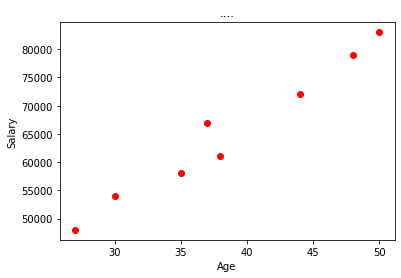

In [25]:
#ploting the data
plt.scatter(dataset["Age"],dataset["Salary"], color = "red")
plt.title('....')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

In [4]:
#taking care of missing data
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(X[:,1:3])
X[:,1:3]=imputer.transform(X[:,1:3])
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [5]:
#encoding categorical data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(columnTransformer.fit_transform(X), dtype = np.str)
X

array([['1.0', '0.0', '0.0', '44.0', '72000.0'],
       ['0.0', '0.0', '1.0', '27.0', '48000.0'],
       ['0.0', '1.0', '0.0', '30.0', '54000.0'],
       ['0.0', '0.0', '1.0', '38.0', '61000.0'],
       ['0.0', '1.0', '0.0', '40.0', '63777.77777777778'],
       ['1.0', '0.0', '0.0', '35.0', '58000.0'],
       ['0.0', '0.0', '1.0', '38.77777777777778', '52000.0'],
       ['1.0', '0.0', '0.0', '48.0', '79000.0'],
       ['0.0', '1.0', '0.0', '50.0', '83000.0'],
       ['1.0', '0.0', '0.0', '37.0', '67000.0']], dtype='<U17')

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
Y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [7]:
#spliting of dataset in test and train
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 25)

In [8]:
#feature scalling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [9]:
X_test

array([[ 1.29099445, -0.77459667, -0.57735027, -0.94988383, -0.81563923],
       [-0.77459667, -0.77459667,  1.73205081, -2.27787677, -1.77836095]])